# Notebook 3 - Model 2. Support Vector Machine Regressor

## PCA after initial hyperparameter tuning 

## Simon Kennedy a1792695

## Loading the dataset

#### Loading the previously cleaned dataset and checking that it loaded correctly

In [1]:
import numpy as np
import pandas as pd

cancer_df = pd.DataFrame(pd.read_csv("cancer_clean.csv"))
cancer_df.head()

,avgAnnCount,TARGET_deathRate,incidenceRate,povertyPercent,studyPerCap,binnedInc,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,...,PctPrivateCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,State
0,1397.0,164.9,489.8,11.2,499.748204,10,36.9,41.7,2.54,52.5,...,75.1,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,47
1,173.0,161.3,411.6,18.6,23.111234,7,32.2,33.7,2.34,44.5,...,70.2,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,47
2,102.0,174.7,349.7,14.6,47.560164,7,44.0,45.8,2.62,54.2,...,63.7,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,47
3,427.0,194.8,430.4,17.1,342.637253,5,42.2,43.4,2.52,52.7,...,58.4,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,47
4,57.0,144.4,350.1,12.5,0.000000,7,47.8,48.9,2.34,57.8,...,61.6,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,47


## Splitting the dataset into Training and Tesing data

### Data Segregation

In [2]:
X = cancer_df.drop(columns = ['TARGET_deathRate'])
y = cancer_df['TARGET_deathRate']

X.shape, y.shape

((3009, 26), (3009,))

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
# test_size is default 0.25 if train_size also none. i.e. train = 0.75, test = 0.25
# defining a seed to get the same split in the data
print(X_train.shape)
print(X_test.shape)

(2256, 26)
(753, 26)


## k fold cross-validation to split the data

In [4]:
# Creating the K-Fold ojbect
from sklearn.model_selection import KFold
cv_method = KFold(n_splits = 3)

# Performing the K-Fold Cross-Validation
for train_index, test_index in cv_method.split(cancer_df):
    
    # Obtaining the index for the training and test sets for the subset
    print("First five train index:", train_index[0:5], "First five test index:", test_index[0:5])
    print('Shape of the Training set:', train_index.shape, 'Shape of the Test set:',test_index.shape, '\n')

First five train index: [1003 1004 1005 1006 1007] First five test index: [0 1 2 3 4]
Shape of the Training set: (2006,) Shape of the Test set: (1003,) 

First five train index: [0 1 2 3 4] First five test index: [1003 1004 1005 1006 1007]
Shape of the Training set: (2006,) Shape of the Test set: (1003,) 

First five train index: [0 1 2 3 4] First five test index: [2006 2007 2008 2009 2010]
Shape of the Training set: (2006,) Shape of the Test set: (1003,) 



# Data Modeling

### Model 2. Support Vector Machine Regression

### Defining the model with scaling and fitting the model

In [5]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# set up the pipeline
svr_model = Pipeline([('scaler', MinMaxScaler()),
                      ('svr', SVR())]) # default kernel is 'rbf'
# fit the model
svr_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svr', SVR())])

#### Getting the RMSE of the predictions

In [6]:
from sklearn.metrics import mean_squared_error

# predicting on the training data
y_train_predict = svr_model.predict(X_train)
# predicting on the test data
y_test_predict = svr_model.predict(X_test)

MSE_train = mean_squared_error(y_train, y_train_predict)
RMSE_train = np.sqrt(MSE_train)
MSE_test = mean_squared_error(y_test, y_test_predict)
RMSE_test = np.sqrt(MSE_test)

print('The SVR model Mean Square Error on training data is : ', MSE_train)
print('The SVR model RMSE on training data is ', RMSE_train)
print('The SVR model Mean Square Error on test data is : ', MSE_test)
print('The SVR model RMSE on test data is ', RMSE_test)

The SVR model Mean Square Error on training data is :  458.6390500780547
The SVR model RMSE on training data is  21.41585977909957
The SVR model Mean Square Error on test data is :  528.9809048534449
The SVR model RMSE on test data is  22.99958488437226


The RMSE of the test data is slightly greater than on the training data as expected which gives some indication that the model is not overfitted.

# Hyperparameter tuning

### Creating the parameter grid and using GridSearchCV( ) with K Fold cross validation splits to find the best parameters

In [7]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {'svr__kernel': ['linear', 'rbf','sigmoid','poly'], # tuning for the best kernel
              'svr__C': [1, 10, 100, 1000, 10000],
              'svr__epsilon': [0.01, 0.1, 1.0],
              'svr__gamma': ['scale', 0.5, 0.1, 0.05, 0.01]}

#Searching for the optimal from param_grid
gridSVR = GridSearchCV(svr_model, param_grid, cv=cv_method, scoring='neg_root_mean_squared_error', verbose = 2, n_jobs= -1)

%time gridSVR.fit(X_train, y_train)
print('Best parameters for SVR_linear', gridSVR.best_params_)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
Wall time: 12min 21s
Best parameters for SVR_linear {'svr__C': 100, 'svr__epsilon': 1.0, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}


#### Assigning the best parameters to the SVR linear TUNED model using grid.best_estimator_

In [8]:
svr_tuned = gridSVR.best_estimator_
svr_tuned

Pipeline(steps=[('scaler', MinMaxScaler()), ('svr', SVR(C=100, epsilon=1.0))])

#### Getting the performance of the TUNED model on the training and testing data

In [9]:
# predicting on the training data
y_tuned_train_predict = svr_tuned.predict(X_train)
# predicting on the test data
y_tuned_test_predict = svr_tuned.predict(X_test)

MSE_tuned_train = mean_squared_error(y_train, y_tuned_train_predict)
RMSE_tuned_train = np.sqrt(MSE_tuned_train)
MSE_tuned_test = mean_squared_error(y_test, y_tuned_test_predict)
RMSE_tuned_test = np.sqrt(MSE_tuned_test)

print('The TUNED svr model Mean Square Error on training data is : ', MSE_tuned_train)
print('The TUNED svr model RMSE on training data is ', RMSE_tuned_train)
print('The TUNED svr model Mean Square Error on test data is : ', MSE_tuned_test)
print('The TUNED svr model RMSE on test data is ', RMSE_tuned_test)

The TUNED svr model Mean Square Error on training data is :  274.584682098302
The TUNED svr model RMSE on training data is  16.570596914363165
The TUNED svr model Mean Square Error on test data is :  348.64215756933305
The TUNED svr model RMSE on test data is  18.67196180291008


The RMSE of the test data is 12.6% greater than on the training data which gives some indication that the model may have some over or under fitting.

In [10]:
print('Best Cross-Validation Accuracy: ',gridSVR.best_score_)

Best Cross-Validation Accuracy:  -19.146733989922033


In [11]:
# Top 5 GridsearchCV results
import pandas as pd
svr_tuned_cv_results = pd.DataFrame(gridSVR.cv_results_)
svr_tuned_cv_results = svr_tuned_cv_results[['rank_test_score','param_svr__C','param_svr__epsilon', 'param_svr__gamma','param_svr__kernel','mean_test_score', 'std_test_score']]
svr_tuned_cv_results.sort_values(by='rank_test_score').head()

,rank_test_score,param_svr__C,param_svr__epsilon,param_svr__gamma,param_svr__kernel,mean_test_score,std_test_score
161,1,100,1.0,scale,rbf,-19.146734,0.583800
165,2,100,1.0,0.5,rbf,-19.163720,0.574205
141,3,100,0.1,scale,rbf,-19.169852,0.589193
121,4,100,0.01,scale,rbf,-19.172775,0.589501
125,5,100,0.01,0.5,rbf,-19.177108,0.596045


## Hyperparameter tuning with PCA

In [14]:
from sklearn.decomposition import PCA

# set up the pipeline
svr_pca = Pipeline([('scaler', MinMaxScaler()),
                       ('pca', PCA()),
                      ('svr', SVR(kernel='rbf'))])

param_grid = {'svr__C': [1, 10, 100, 1000],
              'svr__epsilon': [0.01, 0.1, 1.0],
              'svr__gamma': ['scale', 0.5, 0.1, 0.05, 0.01],
             'pca': [PCA(10), PCA(12), PCA(15), PCA(20), PCA(26)]}

#Searching for the optimal from param_grid
gridSVR_pca = GridSearchCV(svr_pca, param_grid, cv=cv_method, verbose = 2, n_jobs= -1)

%time gridSVR_pca.fit(X_train, y_train)
print('Best parameters for SVR_linear', gridSVR_pca.best_params_)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
Wall time: 45.8 s
Best parameters for SVR_linear {'pca': PCA(n_components=26), 'svr__C': 100, 'svr__epsilon': 1.0, 'svr__gamma': 0.5}


#### Assigning the best parameters including PCA

In [15]:
svr_tuned_pca = gridSVR_pca.best_estimator_
svr_tuned_pca

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=26)),
                ('svr', SVR(C=100, epsilon=1.0, gamma=0.5))])

In [16]:
# predicting on the test data
y_tuned_pca_predict = svr_tuned_pca.predict(X_test)

MSE_tuned_pca = mean_squared_error(y_test, y_tuned_pca_predict)
RMSE_tuned_pca = np.sqrt(mean_squared_error(y_test, y_tuned_pca_predict))

print('The svr TUNED with PCA model MSE is ', MSE_tuned_pca)
print('The svr TUNED with PCA model RMSE is ', RMSE_tuned_pca)

The svr TUNED with PCA model MSE is  345.0674901897284
The svr TUNED with PCA model RMSE is  18.575992307000142


### Table of performance results on testing data

In [17]:
from tabulate import tabulate

#create data
data = [["Baseline", 823.34, 28.69], 
        ["Untuned", MSE_test, RMSE_test],
       ["Tuned", MSE_tuned_test, RMSE_tuned_test],
       ["Tuned + PCA", MSE_tuned_pca, RMSE_tuned_pca]]
  
#define header names
col_names = ["Model", "MSE", "RMSE"]
  
#display table
print(tabulate(data, headers = col_names))

Model            MSE     RMSE
-----------  -------  -------
Baseline     823.34   28.69
Untuned      528.981  22.9996
Tuned        348.642  18.672
Tuned + PCA  345.067  18.576


#### Plotting the predicted values from the tuned SVR model against the real values

[]

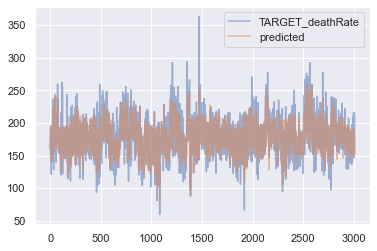

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

cancer_df['predicted'] = svr_tuned.predict(X)
cancer_df[['TARGET_deathRate', 'predicted']].plot(alpha=0.5)

plt.plot()

This model has not been saved as it is not the best model.